# Importing necesssary libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
df=pd.read_csv("diabetic_data.csv")

# Examine Data

##  Step 2.1: Load & Inspect Diabetes Readmission Dataset

In [ ]:
print("Dataset shape (rows, columns):", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())


missing_counts = (df == "?").sum()
print("\nMissing values per column (represented as '?'):")
print(missing_counts[missing_counts > 0])


print("\nTarget Variable (Readmitted) Distribution:")
print(df['readmitted'].value_counts())


for col in ['race', 'gender', 'age', 'diabetesMed', 'insulin']:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Dataset shape (rows, columns): (101766, 50)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  

## Step 2.2: Data Cleaning Plan

In [ ]:
df.drop(columns=["encounter_id", "patient_nbr", "weight", "payer_code", "medical_specialty"], inplace=True)

df = df.replace("?", "Unknown")

df["gender"] = df["gender"].replace("Unknown/Invalid", "Unknown")

age_map = {
    "[0-10)": 5, "[10-20)": 15, "[20-30)": 25, "[30-40)": 35,
    "[40-50)": 45, "[50-60)": 55, "[60-70)": 65, "[70-80)": 75,
    "[80-90)": 85, "[90-100)": 95
}
df["age"] = df["age"].map(age_map)
df["readmit_binary"] = df["readmitted"].apply(lambda x: 1 if x == "<30" else 0)

print("\nCleaned Dataset Shape:", df.shape)
print("\nTarget Distribution (binary):")
print(df["readmit_binary"].value_counts())



Cleaned Dataset Shape: (101766, 46)

Target Distribution (binary):
readmit_binary
0    90409
1    11357
Name: count, dtype: int64


## Step 3: Exploratory Data Analysis (EDA)

C:\Users\Jibran\AppData\Local\Temp\ipykernel_10976\2577766566.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x, hue=hue, data=data, palette=colors, order=order)
C:\Users\Jibran\AppData\Local\Temp\ipykernel_10976\2577766566.py:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(x=x, hue=hue, data=data, palette=colors, order=order)
C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When g

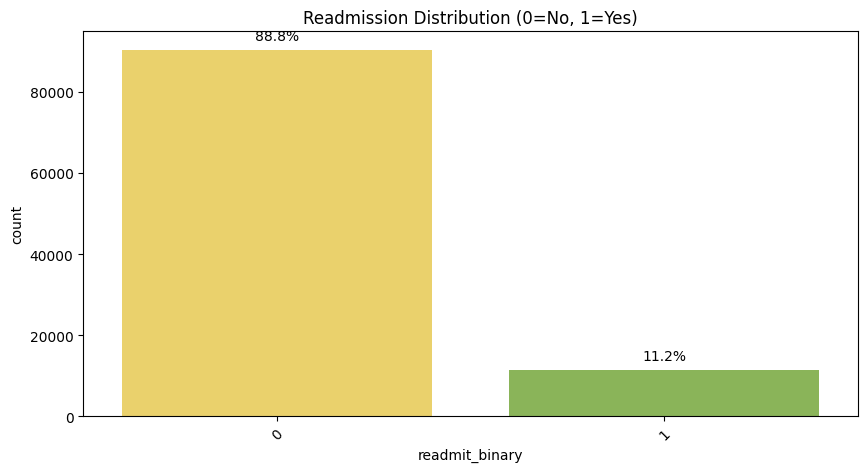

C:\Users\Jibran\AppData\Local\Temp\ipykernel_10976\2577766566.py:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(x=x, hue=hue, data=data, palette=colors, order=order)
C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


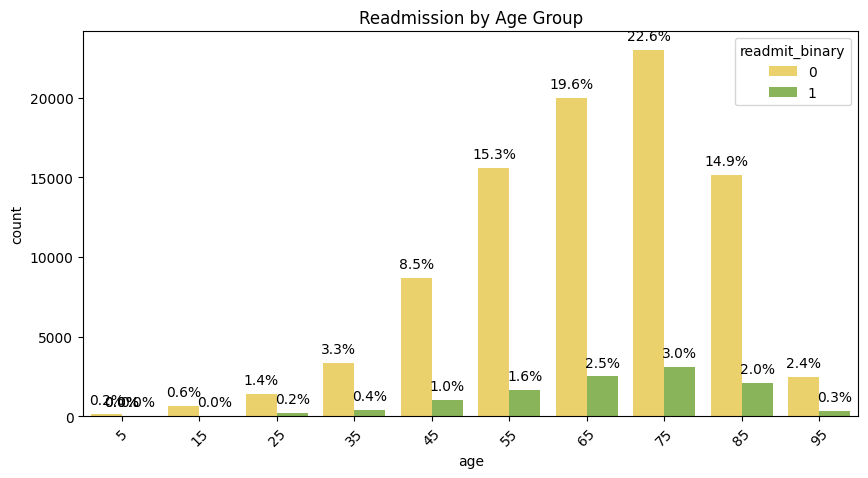

C:\Users\Jibran\AppData\Local\Temp\ipykernel_10976\2577766566.py:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(x=x, hue=hue, data=data, palette=colors, order=order)
C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


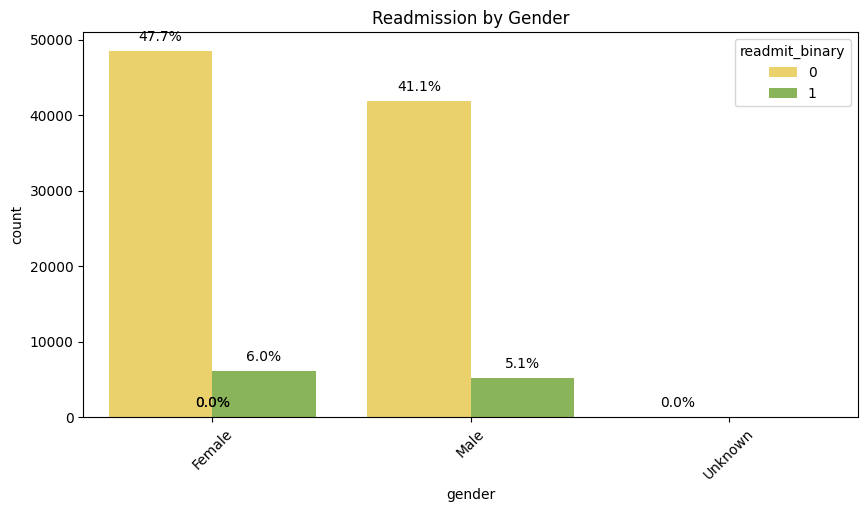

C:\Users\Jibran\AppData\Local\Temp\ipykernel_10976\2577766566.py:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(x=x, hue=hue, data=data, palette=colors, order=order)
C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


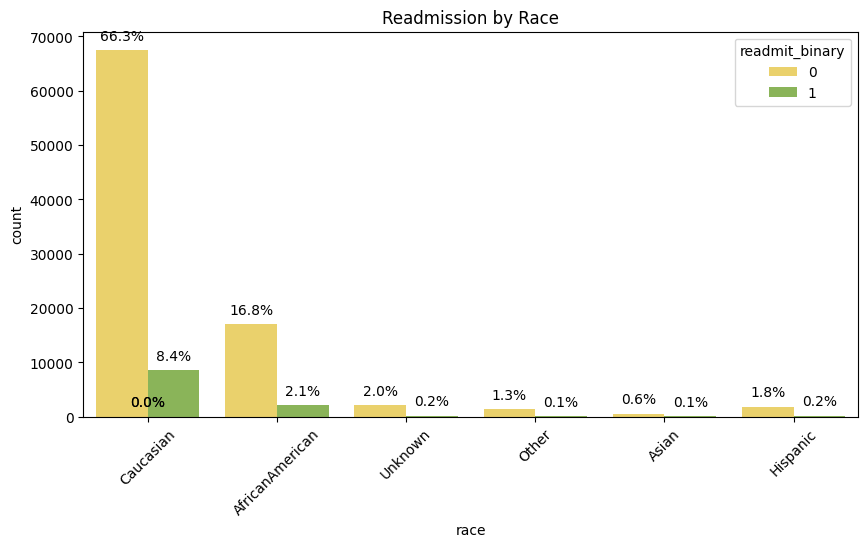

C:\Users\Jibran\AppData\Local\Temp\ipykernel_10976\2577766566.py:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(x=x, hue=hue, data=data, palette=colors, order=order)
C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


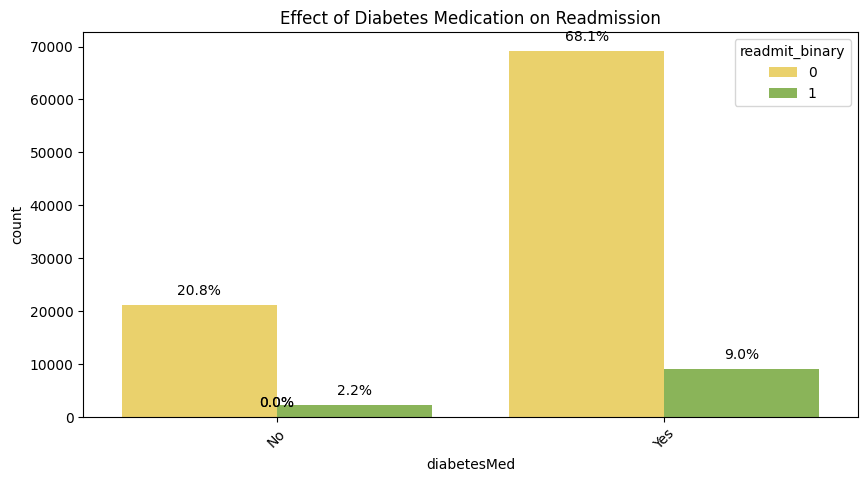

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom colors
colors = ["#FFDD57", "#8BC34A", "#03A9F4"]  

def plot_count_percentage(data, x, hue=None, title="", order=None):
    """
    Plots a countplot with percentages on each bar.
    """
    plt.figure(figsize=(10,5))
    ax = sns.countplot(x=x, hue=hue, data=data, palette=colors, order=order)

    # Add percentages on top of bars
    total_counts = data.groupby([x])[hue].count() if hue else len(data)
    for p in ax.patches:
        height = p.get_height()
        if hue:
            percent = f'{height / sum(data[x]==p.get_x() + p.get_width()/2) * 100:.1f}%' if sum(data[x]==p.get_x() + p.get_width()/2) else f'{height/len(data)*100:.1f}%'
        else:
            percent = f'{height/len(data)*100:.1f}%'
        ax.annotate(percent, (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0,5),
                    textcoords='offset points')
    
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


plot_count_percentage(df, x='readmit_binary', title="Readmission Distribution (0=No, 1=Yes)")

plot_count_percentage(df, x='age', hue='readmit_binary', title="Readmission by Age Group", order=sorted(df['age'].unique()))

plot_count_percentage(df, x='gender', hue='readmit_binary', title="Readmission by Gender")

plot_count_percentage(df, x='race', hue='readmit_binary', title="Readmission by Race")

plot_count_percentage(df, x='diabetesMed', hue='readmit_binary', title="Effect of Diabetes Medication on Readmission")
plt.show()


# Step 4: Data Preparation

## 4.2 Encode Categorical Features

In [ ]:
categorical_cols = ['race', 'gender', 'insulin', 'diabetesMed']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Encoded DataFrame shape:", df_encoded.shape)


Encoded DataFrame shape: (101766, 53)


## 4.3 Scale Numerical Features

In [7]:
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures',
            'num_procedures', 'num_medications', 'number_outpatient',
            'number_emergency', 'number_inpatient', 'number_diagnoses']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

## 4.4 Split Dataset into Train/Test

In [ ]:
X = df_encoded.drop(['readmit_binary', 'readmitted'], axis=1)
y = df_encoded['readmit_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (81412, 51)
Test shape: (20354, 51)


In [14]:
# Check for non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change'],
      dtype='object')


In [15]:
for col in non_numeric_cols:
    X_train[col] = X_train[col].astype(str)  # ensure string type for encoding
    X_test[col] = X_test[col].astype(str)


In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train), index=X_train.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test), index=X_test.index)

# After encoding, make sure columns are aligned
X_train_final = X_train_encoded
X_test_final = X_test_encoded


C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [3, 5, 7, 8, 10, 11, 12, 13, 22, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_bal).value_counts())


Class distribution after SMOTE:
readmit_binary
0    72326
1    72326
Name: count, dtype: int64


In [ ]:
print("Non-numeric columns in X_train:", X_train.select_dtypes(include='object').columns)
print("Non-numeric columns in X_test:", X_test.select_dtypes(include='object').columns)
from sklearn.preprocessing import OneHotEncoder
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]), index=X_train.index)

X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), index=X_test.index)

X_train_final = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded], axis=1)
X_test_final = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded], axis=1)


Non-numeric columns in X_train: Index(['diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change'],
      dtype='object')
Non-numeric columns in X_test: Index(['diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone'

C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2, 10, 18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_bal).value_counts())


Class distribution after SMOTE:
readmit_binary
0    72326
1    72326
Name: count, dtype: int64


In [22]:
# ---------------------------
# 3. Logistic Regression (Baseline)
# ---------------------------
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs')  # increase max_iter
lr_model.fit(X_train_bal, y_train_bal)
y_pred_lr = lr_model.predict(X_test_final)

print("=== Logistic Regression ===")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test_final)[:,1]))

C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79     18083
           1       0.16      0.45      0.23      2271

    accuracy                           0.67     20354
   macro avg       0.53      0.57      0.51     20354
weighted avg       0.83      0.67      0.73     20354

Confusion Matrix:
 [[12708  5375]
 [ 1257  1014]]
ROC-AUC: 0.6041114832961265


In [23]:
# ---------------------------
# 4. Random Forest Classifier
# ---------------------------
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_bal, y_train_bal)
y_pred_rf = rf_model.predict(X_test_final)

print("\n=== Random Forest ===")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test_final)[:,1]))


=== Random Forest ===
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.59      0.01      0.03      2271

    accuracy                           0.89     20354
   macro avg       0.74      0.51      0.48     20354
weighted avg       0.86      0.89      0.84     20354

Confusion Matrix:
 [[18063    20]
 [ 2242    29]]
ROC-AUC: 0.6436235497391998
